In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('data_source/recent-grads.csv')
recent_grads_title = recent_grads.iloc[0]
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [2]:
#Look up the numbers of rows in recent_grads
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

Need to remove all rows with missing values to prevent error when plotting chart.

In [3]:
recent_grads = recent_grads.dropna()

In [4]:
cleaned_data_count = recent_grads.shape
cleaned_data_count

(172, 21)

## Generate scatter plots to explore the following relations

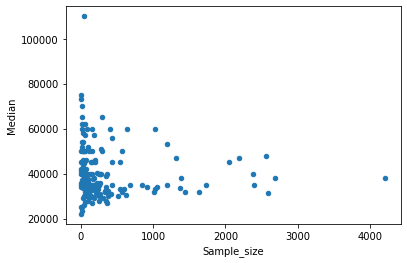

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

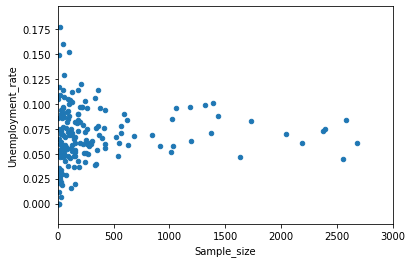

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', xlim=(0,3000))

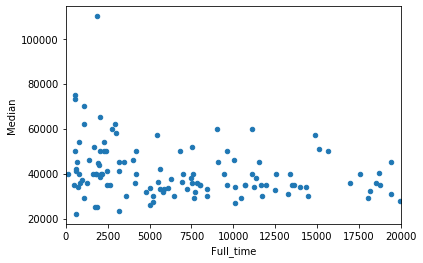

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', xlim=(0,20000))

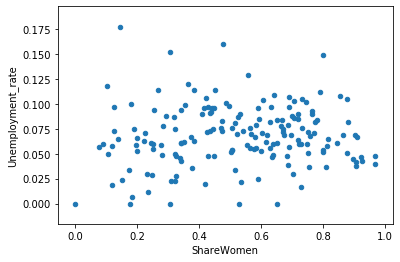

In [8]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

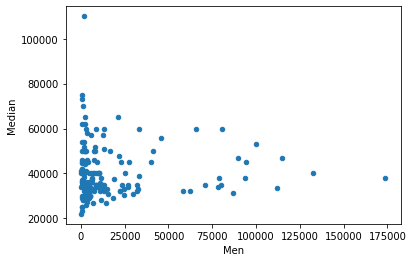

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

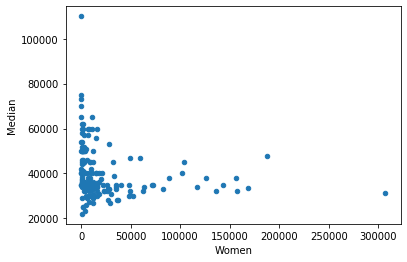

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

Do students in more popular majors make more money?
The data didn't show a relationship between popular majors and the income they make. Through the scatterplot, we can see that majority of the grad student earn between 20k-40k annually.

Do students that majored in subject that were majority female make more money?
The data shows similarities between men and women in the amount that they make.

Is there any link between the number of full-time employees and median salary?
There isn't any link between the two.

## Generate histogram to emplore the distribution of the following columns 

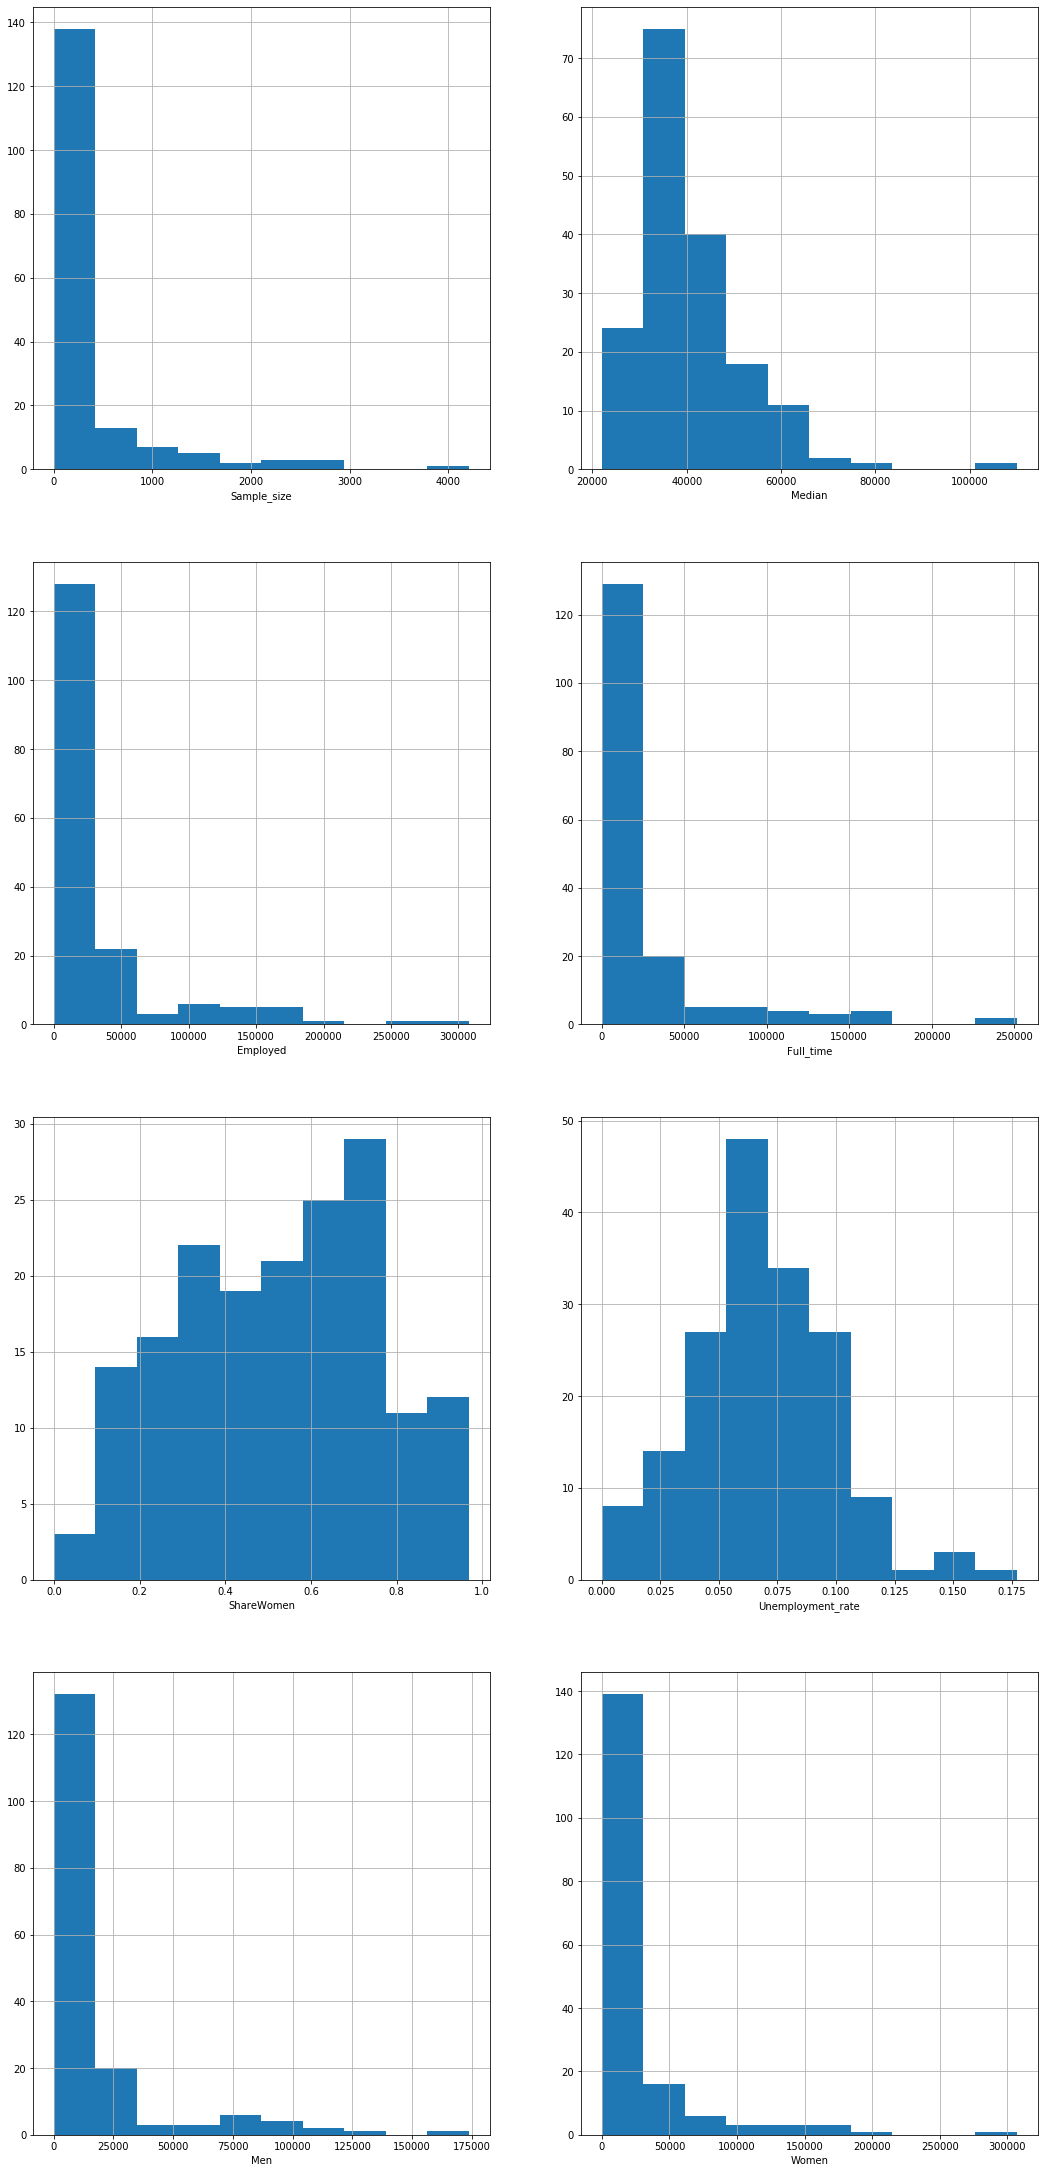

In [11]:
hist_col = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,80))
for r in range(8):
    ax = fig.add_subplot(8,2,r+1)
    ax = recent_grads[hist_col[r]].hist()
    ax.set_xlabel(hist_col[r])

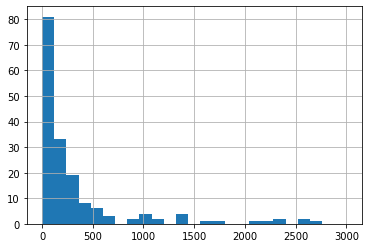

In [12]:
recent_grads['Sample_size'].hist(bins=25, range=(0,3000))

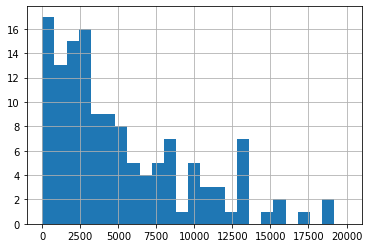

In [13]:
recent_grads['Men'].hist(bins=25, range=(0,20000))

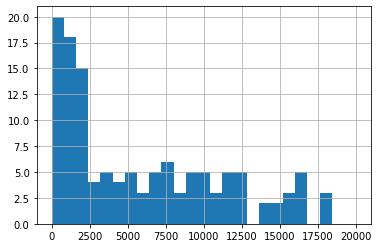

In [14]:
recent_grads['Women'].hist(bins=25, range=(0,20000))

Finding:
- The most common median salary range is between 30,000 to 40,000.

## Scatter matrix plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156ab630>,
      dtype=object)

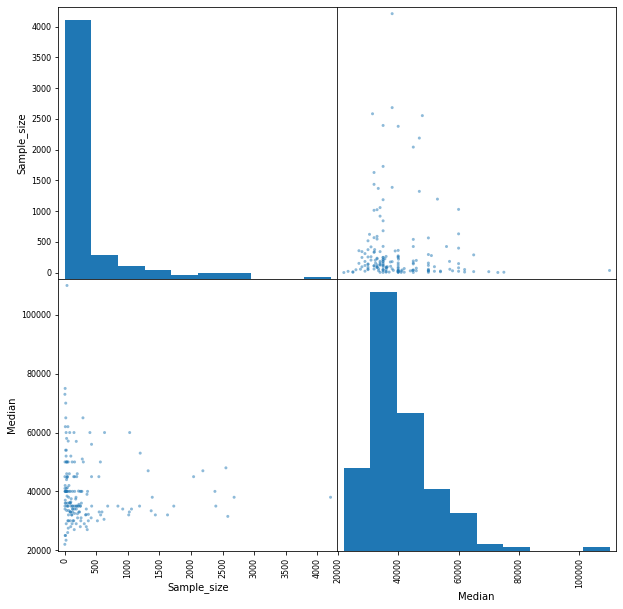

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117fb93c8>,
      dtype=object)

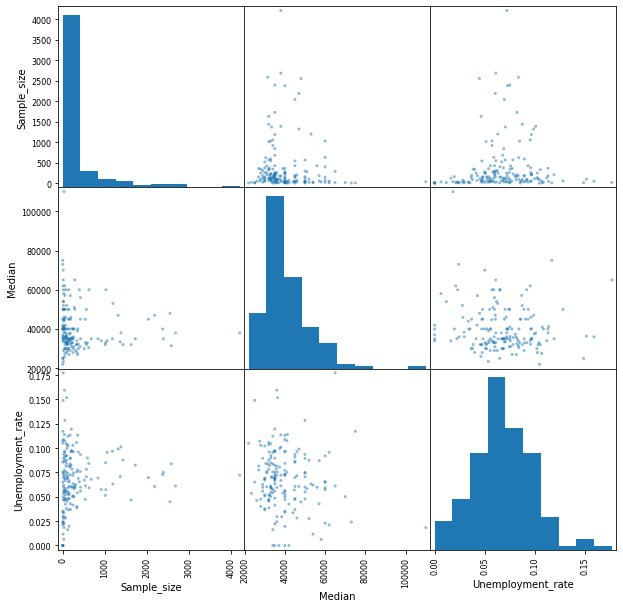

In [16]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Create bar plot 

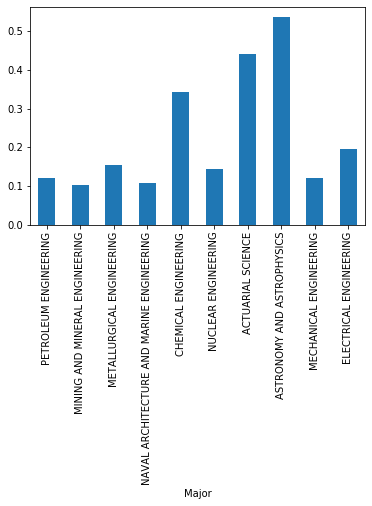

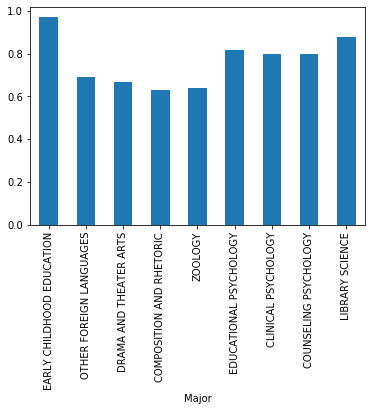

In [17]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

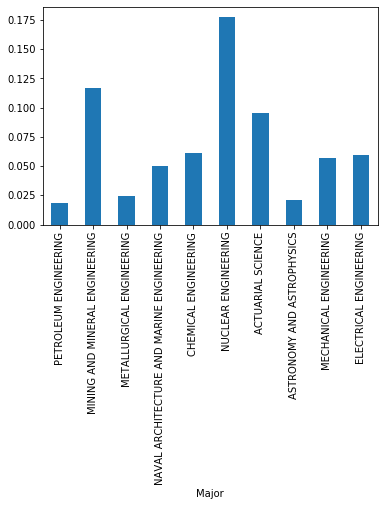

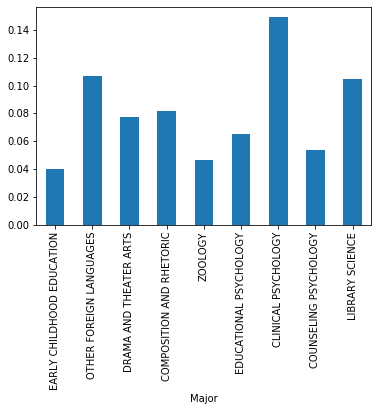

In [18]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

In [19]:
tm = recent_grads.pivot_table(index = 'Major_category', values = ['Men','Women'],aggfunc = np.sum)
tm
#Explore the popularity in major between men and women

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


In [20]:
recent_grads[['Major','Men','Women']]

,Major,Men,Women
0,PETROLEUM ENGINEERING,2057.0,282.0
1,MINING AND MINERAL ENGINEERING,679.0,77.0
2,METALLURGICAL ENGINEERING,725.0,131.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0
4,CHEMICAL ENGINEERING,21239.0,11021.0
5,NUCLEAR ENGINEERING,2200.0,373.0
6,ACTUARIAL SCIENCE,2110.0,1667.0
7,ASTRONOMY AND ASTROPHYSICS,832.0,960.0
8,MECHANICAL ENGINEERING,80320.0,10907.0
9,ELECTRICAL ENGINEERING,65511.0,16016.0
